###  Breast cancer Analysis using logistic regression without regularization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix #Confusion matrix
from sklearn.datasets import load_breast_cancer

In [2]:
dataset = load_breast_cancer()
X = dataset.data
Y = dataset.target


In [3]:
print(dataset.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [15]:
dataset.target_names

array(['malignant', 'benign'],
      dtype='<U9')

In [4]:
data = pd.DataFrame(dataset.data, columns=[dataset.feature_names])
data['Target'] = pd.Series(data=dataset.target, index=data.index)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,:30]
Y = data.iloc[:,30:]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
print("X_train=",X_train.shape,"X_test=",X_test.shape,"y_train=",y_train.shape,"y_test=",y_test.shape)

X_train= (455, 30) X_test= (114, 30) y_train= (455, 1) y_test= (114, 1)


## normalizing the datasets

In [6]:
X_train_norm = (X_train-np.mean(X_train))/np.std(X_train)
X_test_norm = (X_test-np.mean(X_test))/np.std(X_test)

## Implementing Logistic Regression

In [54]:
#sigmoid funtion
def sigmoid(z):
    return 1/(1+np.exp(-z))

#Nonregularized cost function
def propagate(theta, X, y):
    m = len(y)
    A = sigmoid(np.dot(X,theta))
    cost = -(np.sum(y*np.log(A)+(1-y)*np.log(1-A)))/m
    grad = (1 / m) * np.dot(X.T,(A - y))
    return grad,cost

def optimize(theta,X,y,learning_rate,iteration,print_cost= False):
    costs = []
    
    for i in range(iteration):
        grad,cost = propagate(theta,X,y)
        theta = theta-learning_rate-grad
        if i % 10 == 0:
            costs.append(cost)
        if print_cost and i %500 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    return theta,grad,costs     

def predict(theta,X):
    m = X.shape[0]
    Y_prediction = np.zeros((m,1))
    A = sigmoid(np.dot(X,theta))
    for i in range(A.shape[0]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        if A[i,0] < 0.5:
            Y_prediction[i,0] = 0
        else:
            Y_prediction[i,0] =1
    return Y_prediction  

In [49]:
theta = np.random.randn(X.shape[1],1)*0.01
theta,grads,costs = optimize(theta,X_train_norm,y_train,learning_rate=0.001,iteration=10000,print_cost=True)

Cost after iteration 0: 0.699358
Cost after iteration 500: 0.046896
Cost after iteration 1000: 0.043776
Cost after iteration 1500: 0.042022
Cost after iteration 2000: 0.040785


/home/bikash/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


Cost after iteration 2500: 0.039860
Cost after iteration 3000: 0.039142
Cost after iteration 3500: 0.038568
Cost after iteration 4000: 0.038096
Cost after iteration 4500: 0.037698
Cost after iteration 5000: 0.037357
Cost after iteration 5500: 0.037060
Cost after iteration 6000: 0.036798
Cost after iteration 6500: 0.036564
Cost after iteration 7000: 0.036354
Cost after iteration 7500: 0.036166
Cost after iteration 8000: 0.035995
Cost after iteration 8500: 0.035840
Cost after iteration 9000: 0.035699
Cost after iteration 9500: 0.035571


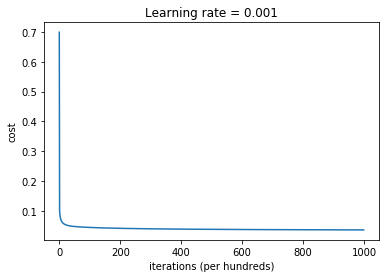

In [55]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate = 0.001")
plt.show()

In [58]:
Y_prediction_test = predict(theta, X_test_norm)
Y_prediction_train = predict(theta, X_train_norm)
print("Test cost:",costs[-1])
print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - y_train)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - y_test)) * 100))


Test cost: Target    0.035457
dtype: float64
train accuracy: Target    98.901099
dtype: float64 %
test accuracy: Target    98.245614
dtype: float64 %


In [48]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train_norm,y_train)
predict = clf.predict(X_test_norm)

print("score Scikit learn:", clf.score(X_test_norm,y_test)*100)

score Scikit learn: 98.2456140351


/home/bikash/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


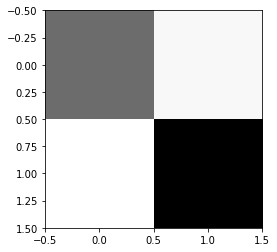

In [66]:
cfm = confusion_matrix(y_test, Y_prediction_test)
plt.imshow(cfm, cmap='binary', interpolation='Nearest')
plt.show()